In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import date
from datetime import datetime
import requests
import json
import yfinance as yf
plt.style.use('ggplot')

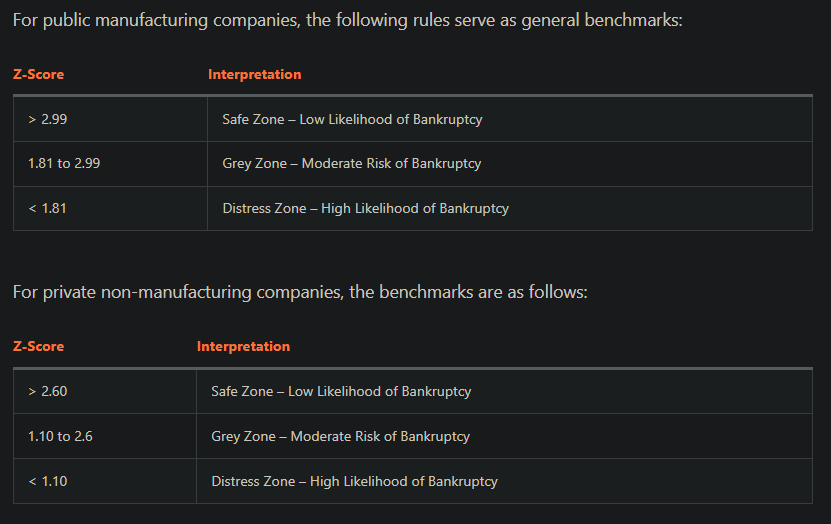


In [48]:
#TODO: Make it so users have to input their own FMP API key
FMP_API_KEY = "zOWo5NgWst2Ill1VXevneIirrvWYgO3h"
FMP_API_KEY_FULL = "apikey=zOWo5NgWst2Ill1VXevneIirrvWYgO3h"
FMP_URL = "https://financialmodelingprep.com/api/v3"
SYMBOL='AAPL'

ticker = yf.Ticker(SYMBOL)

altman_public_lower_bound = 1.81
altman_public_upper_bound = 2.99

altman_private_lower_bound = 1.10
altman_private_upper_bound = 2.60


lookback = 1

NameError: name 'yf' is not defined

In [ ]:
def get_symbol_mkt_cap(symbol):
    session = requests.Session()
    request = f"{FMP_URL}/market-capitalization/{symbol}?{FMP_API_KEY_FULL}".replace(" ", "")
    
    r = session.get(request)
    df = None
    if r.status_code == requests.codes.ok:
        df = pd.DataFrame(json.loads(r.text))
        print("market capitalization df: " + str(df.__dataframe__))
    else:
        print("r.status_code is " + str(r.status_code))
        print("market capitalization is None")
            
    return df


In [ ]:
def get_balance_sheet(symbol, lookback):
    # session = requests.Session()
    # request = f"{FMP_URL}/balance-sheet-statement/{symbol}?period=quarter&limit={lookback}&{FMP_API_KEY_FULL}".replace(" ", "")
    
    # r = session.get(request)
    # df = None
    # if r.status_code == requests.codes.ok:
    #     df = pd.DataFrame(json.loads(r.text))
    #     print("balance sheet statement df: " + str(df.__dataframe__))
    # else:
    #     print("r.status_code is " + str(r.status_code))
    #     print("balance sheet statement is None")
        
    # return df

    return ticker.balance_sheet

In [ ]:
def get_income_statement(symbol, lookback):
    session = requests.Session()
    request = f"{FMP_URL}/income-statement/{symbol}?period=quarter&limit={lookback}&{FMP_API_KEY_FULL}".replace(" ", "")
    
    r = session.get(request)
    df = None
    if r.status_code == requests.codes.ok:
        df = pd.DataFrame(json.loads(r.text))
        print("income statement df: " + str(df.__dataframe__))
    else:
        print("r.status_code is " + str(r.status_code))
        print("income statement is None")
        
    return df

In [ ]:
def get_key_metrics(symbol, lookback):
    session = requests.Session()
    request = f"{FMP_URL}/key-metrics/{symbol}?period=quarter&datatype=json&limit={lookback}&{FMP_API_KEY_FULL}".replace(" ", "")
    
    r = session.get(request)
    df = None
    if r.status_code == requests.codes.ok:
        df = pd.DataFrame(json.loads(r.text))
        print("key metrics df: " + str(df.__dataframe__))
    else:
        print("r.status_code is " + str(r.status_code))
        print("key metrics is None")
        
    return df

In [ ]:
market_cap = get_symbol_mkt_cap(symbol=SYMBOL)
balance_sheet = get_balance_sheet(symbol=SYMBOL, lookback=lookback)
income_statement = get_income_statement(symbol=SYMBOL, lookback=lookback)
key_metrics = get_key_metrics(symbol=SYMBOL, lookback=lookback)

market capitalization df: <bound method DataFrame.__dataframe__ of   symbol        date      marketCap
0   AAPL  2024-02-01  2867022807500>
r.status_code is 403
balance sheet statement is None
r.status_code is 403
income statement is None
r.status_code is 403
key metrics is None


In [ ]:
A = key_metrics["workingCapital"] / balance_sheet["totalAssets"]
B = balance_sheet["retainedEarnings"] / balance_sheet["totalAssets"]
C = (income_statement["ebitda"] - income_statement['depreciationAndAmortization']) / balance_sheet["totalAssets"]
D = market_cap['marketCap'] / balance_sheet["totalLiabilities"]
E = income_statement["revenue"] / balance_sheet["totalAssets"]

TypeError: 'NoneType' object is not subscriptable

In [ ]:
altman_zscore = 1.2*A + 1.4*B + 3.3*C + 0.6*D + 1.0*E
print(f"The Atltman Z-Score for {SYMBOL} is: {round(altman_zscore[0], 2)} ")